## 二维例子 了解PCA步骤

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据

In [2]:
data1 = loadmat('./ex7/ex7data1.mat')
data1

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

In [3]:
X = data1['X']
X.shape

(50, 2)

### 数据展示

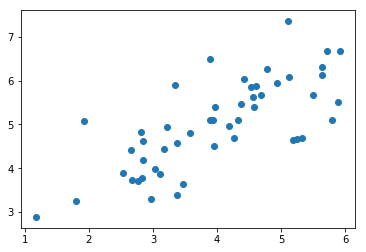

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 1、数据预处理 数据归一化

In [5]:
# 定义归一化函数featureNormalize
def featureNormalizse(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x-mean)/std, mean, std

In [6]:
# test
x_norm, means, stds = featureNormalizse(X)
x_norm[:5]

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417]])

### 2、计算协方差矩阵

In [7]:
print(x_norm.shape)
sigma = (x_norm.T.dot(x_norm))/x_norm.shape[0]
sigma

(50, 2)


array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

### 3、对sigma矩阵奇异值分解

In [8]:
U,S,V = np.linalg.svd(sigma)
U,S,V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [9]:
U[:,0]

array([-0.70710678, -0.70710678])

### 定义PCA

In [10]:
# 整合sigma和svd
def pca(x):
    sigma = (x.T.dot(x))/x.shape[0]
    U,S,V = np.linalg.svd(sigma)
    return U,S,V

### 可视化主成分

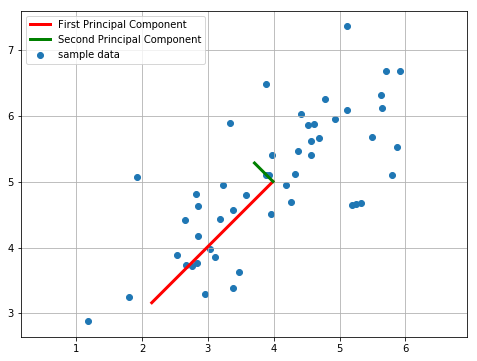

In [11]:
x_norm, means, stds = featureNormalizse(X)
U, S, V = pca(x_norm)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], label='sample data')  # 样本数据点

plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')  # 第一个成分
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')  # 第二个成分

plt.grid()
plt.axis("equal")  
plt.legend()
plt.show()

### 4、计算$ x_{approx} $

In [12]:
# 根据U_reduce计算x_norm的投影Z
def compute_z(X, U, k):
    Z = X.dot(U[:,:k])
    return Z

# test
Z = compute_z(x_norm, U, 1)
Z[:5]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ]])

In [13]:
# 计算x_approx
def compute_x_approx(U, k, Z):
    x_approx = Z.dot(U[:,:k].T)  # 50*1 * 1*2
    return x_approx

# test
x_approx = compute_x_approx(U, 1, Z)
x_approx[:5]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292]])

### 可视化

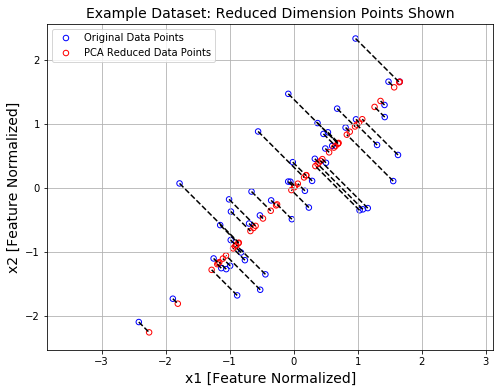

In [14]:
plt.figure(figsize=(8,6))
plt.axis("equal") 
plot = plt.scatter(x_norm[:,0], x_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')  # 画出归一化后原始样本点
plot = plt.scatter(x_approx[:,0], x_approx[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')  # 画出经过PCA后构造的估计值

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(x_norm.shape[0]):  # 画出变换前后的连线
    plt.plot([x_norm[x,0],x_approx[x,0]],[x_norm[x,1],x_approx[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()
plt.show()

## 第二个例子 图像数据集

In [15]:
# 导入数据
face_data = loadmat('./ex7/ex7faces.mat')
face = face_data['X']
face.shape

(5000, 1024)

### 展示数据

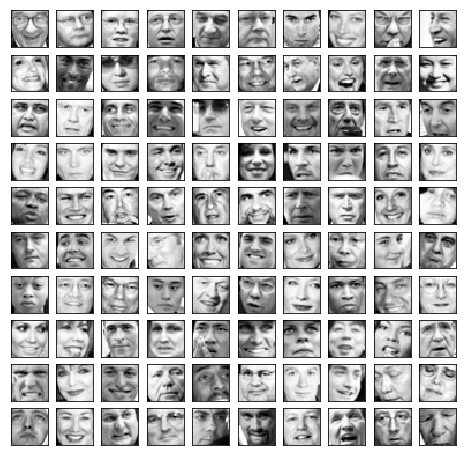

In [16]:
def showFace(X, row, col):
    fig, axs = plt.subplots(row, col, figsize=(8,8))
    for r in range(row):
        for c in range(col):
            axs[r][c].imshow(X[r*col + c].reshape(32,32).T, cmap = 'Greys_r')
            axs[r][c].set_xticks([])
            axs[r][c].set_yticks([])
            
showFace(face, 10, 10)
plt.show()

### PCA降维并重构

In [17]:
face_norm, means, stds = featureNormalizse(face) # 归一化
U, S, V = pca(face_norm)  # 奇异值分解
Z = compute_z(face_norm, U, 16)  # 计算Z
face_approx = compute_x_approx(U, 16, Z) # 计算降维重构后的数据
face_approx.shape

(5000, 1024)

### 图像对比

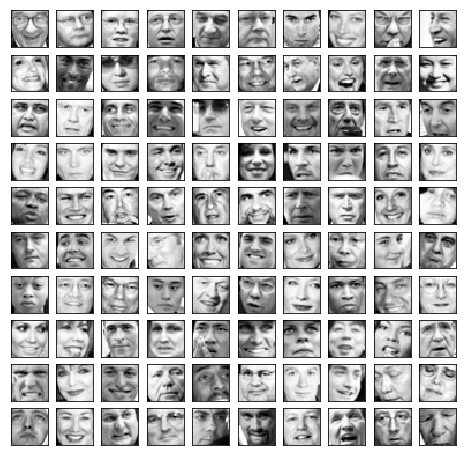

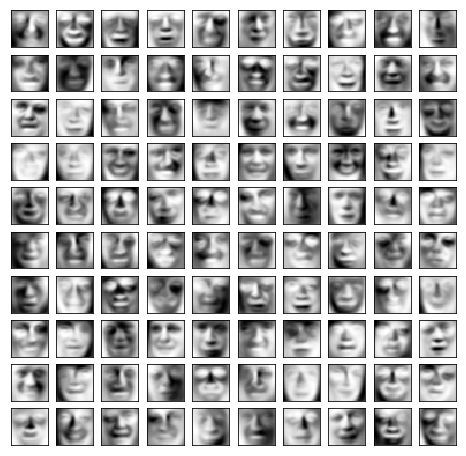

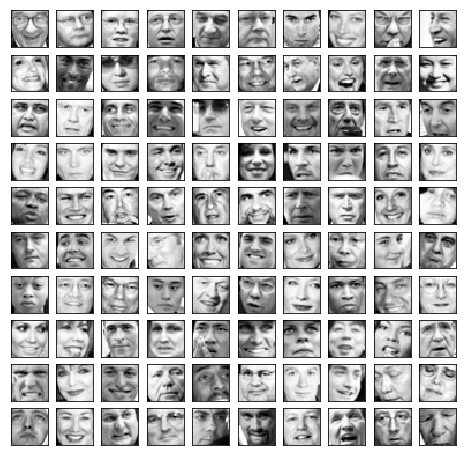

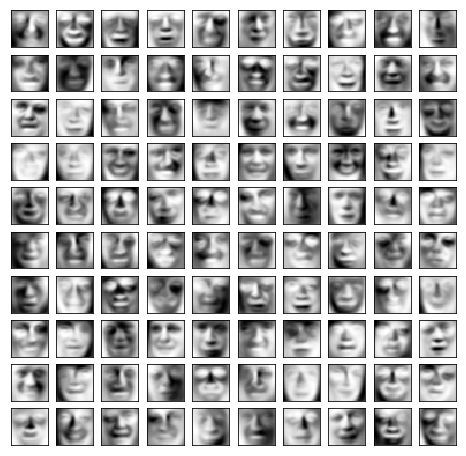

In [19]:
showFace(face, 10, 10)
showFace(face_approx, 10, 10)
plt.show()